In [7]:
import numpy as np 
import pandas as pd 
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import re 
from textblob import TextBlob 
from wordcloud import WordCloud 
import seaborn as sns 
import matplotlib.pyplot as plt 
import cufflinks as cf 
%matplotlib inline from plotly.offline 
import init_notebook_mode,iplot 
init_notebook_mode(connected= True) 
cf.go_offline(); 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show") 
pd.set_option('display.max_rows', None)

UsageError: unrecognized arguments: from plotly.offline


In [11]:
df = pd.read_csv("/Users/ravikumar/Downloads/amazon.csv")

In [10]:
df.head() #only for head data types
#only df full rows and coloumns will display


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [11]:
df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5,I've heard bad things about this 64gb Micro SD...,01-02-2014,310,0,0,0,0,0.0,0.0


In [15]:
df['reviewText'].values[1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [12]:
df=df.sort_values("wilson_lower_bound",ascending =False)
df.drop('Unnamed: 0',inplace=True, axis=1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [16]:
df['reviewText'].values[2]

'it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before'

In [18]:
#To get the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [19]:
#The describe() method returns description of the data in the DataFrame.
df.describe()
    

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [ ]:
#To get the Visualized Graph in the Given data We need to use seaborn and Matplot lib Libraries:


<Axes: xlabel='reviewerName', ylabel='overall'>

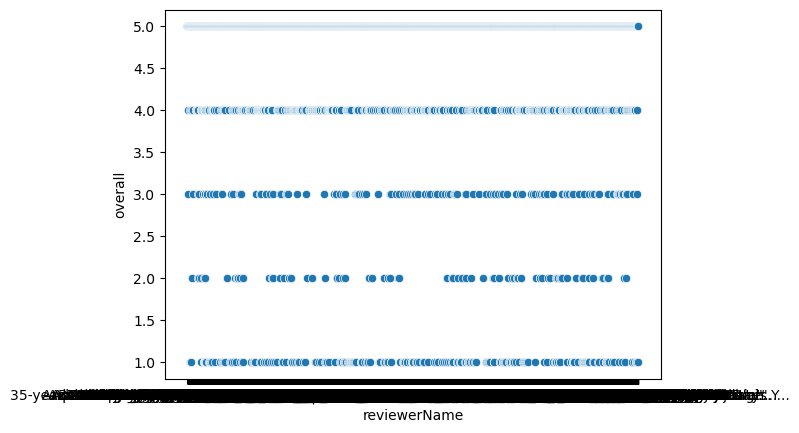

In [20]:
#Scatter Plot
sns.scatterplot(x="reviewerName",y ="overall",data=df)

<Axes: xlabel='reviewerName', ylabel='overall'>

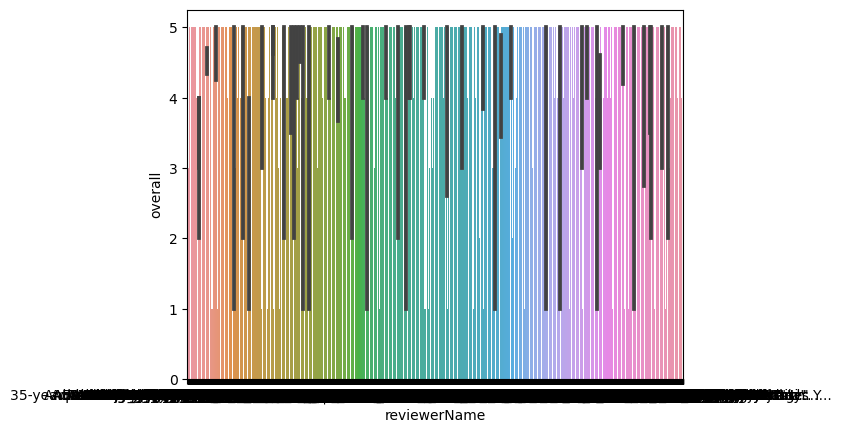

In [23]:
sns.barplot(x="reviewerName",y ="overall",data=df)

<Axes: xlabel='overall', ylabel='reviewerName'>

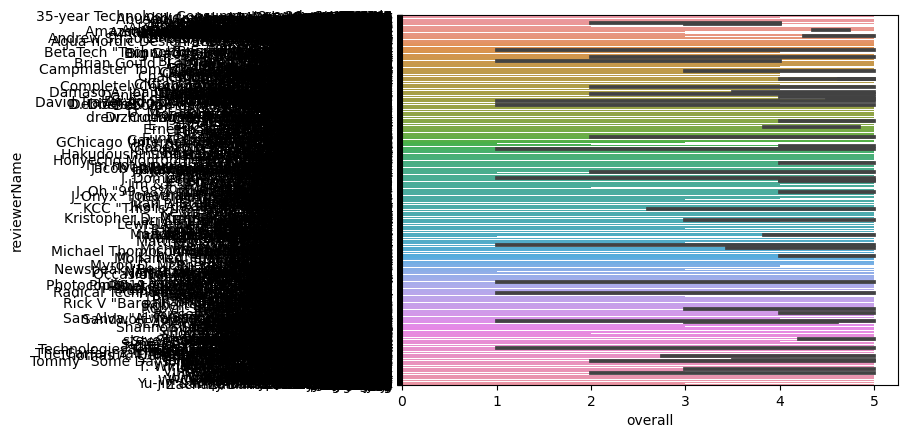

In [24]:
sns.barplot(x="overall",y ="reviewerName",data=df)

In [22]:
#To Differntiate the Graph using hue

sns.barplot(x="overall",y ="score_average_rating",hue ="reviewerName",data=df)

<Axes: xlabel='overall', ylabel='score_average_rating'>

ValueError: Image size of 567x96320 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [9]:
import seaborn as sns 


/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence

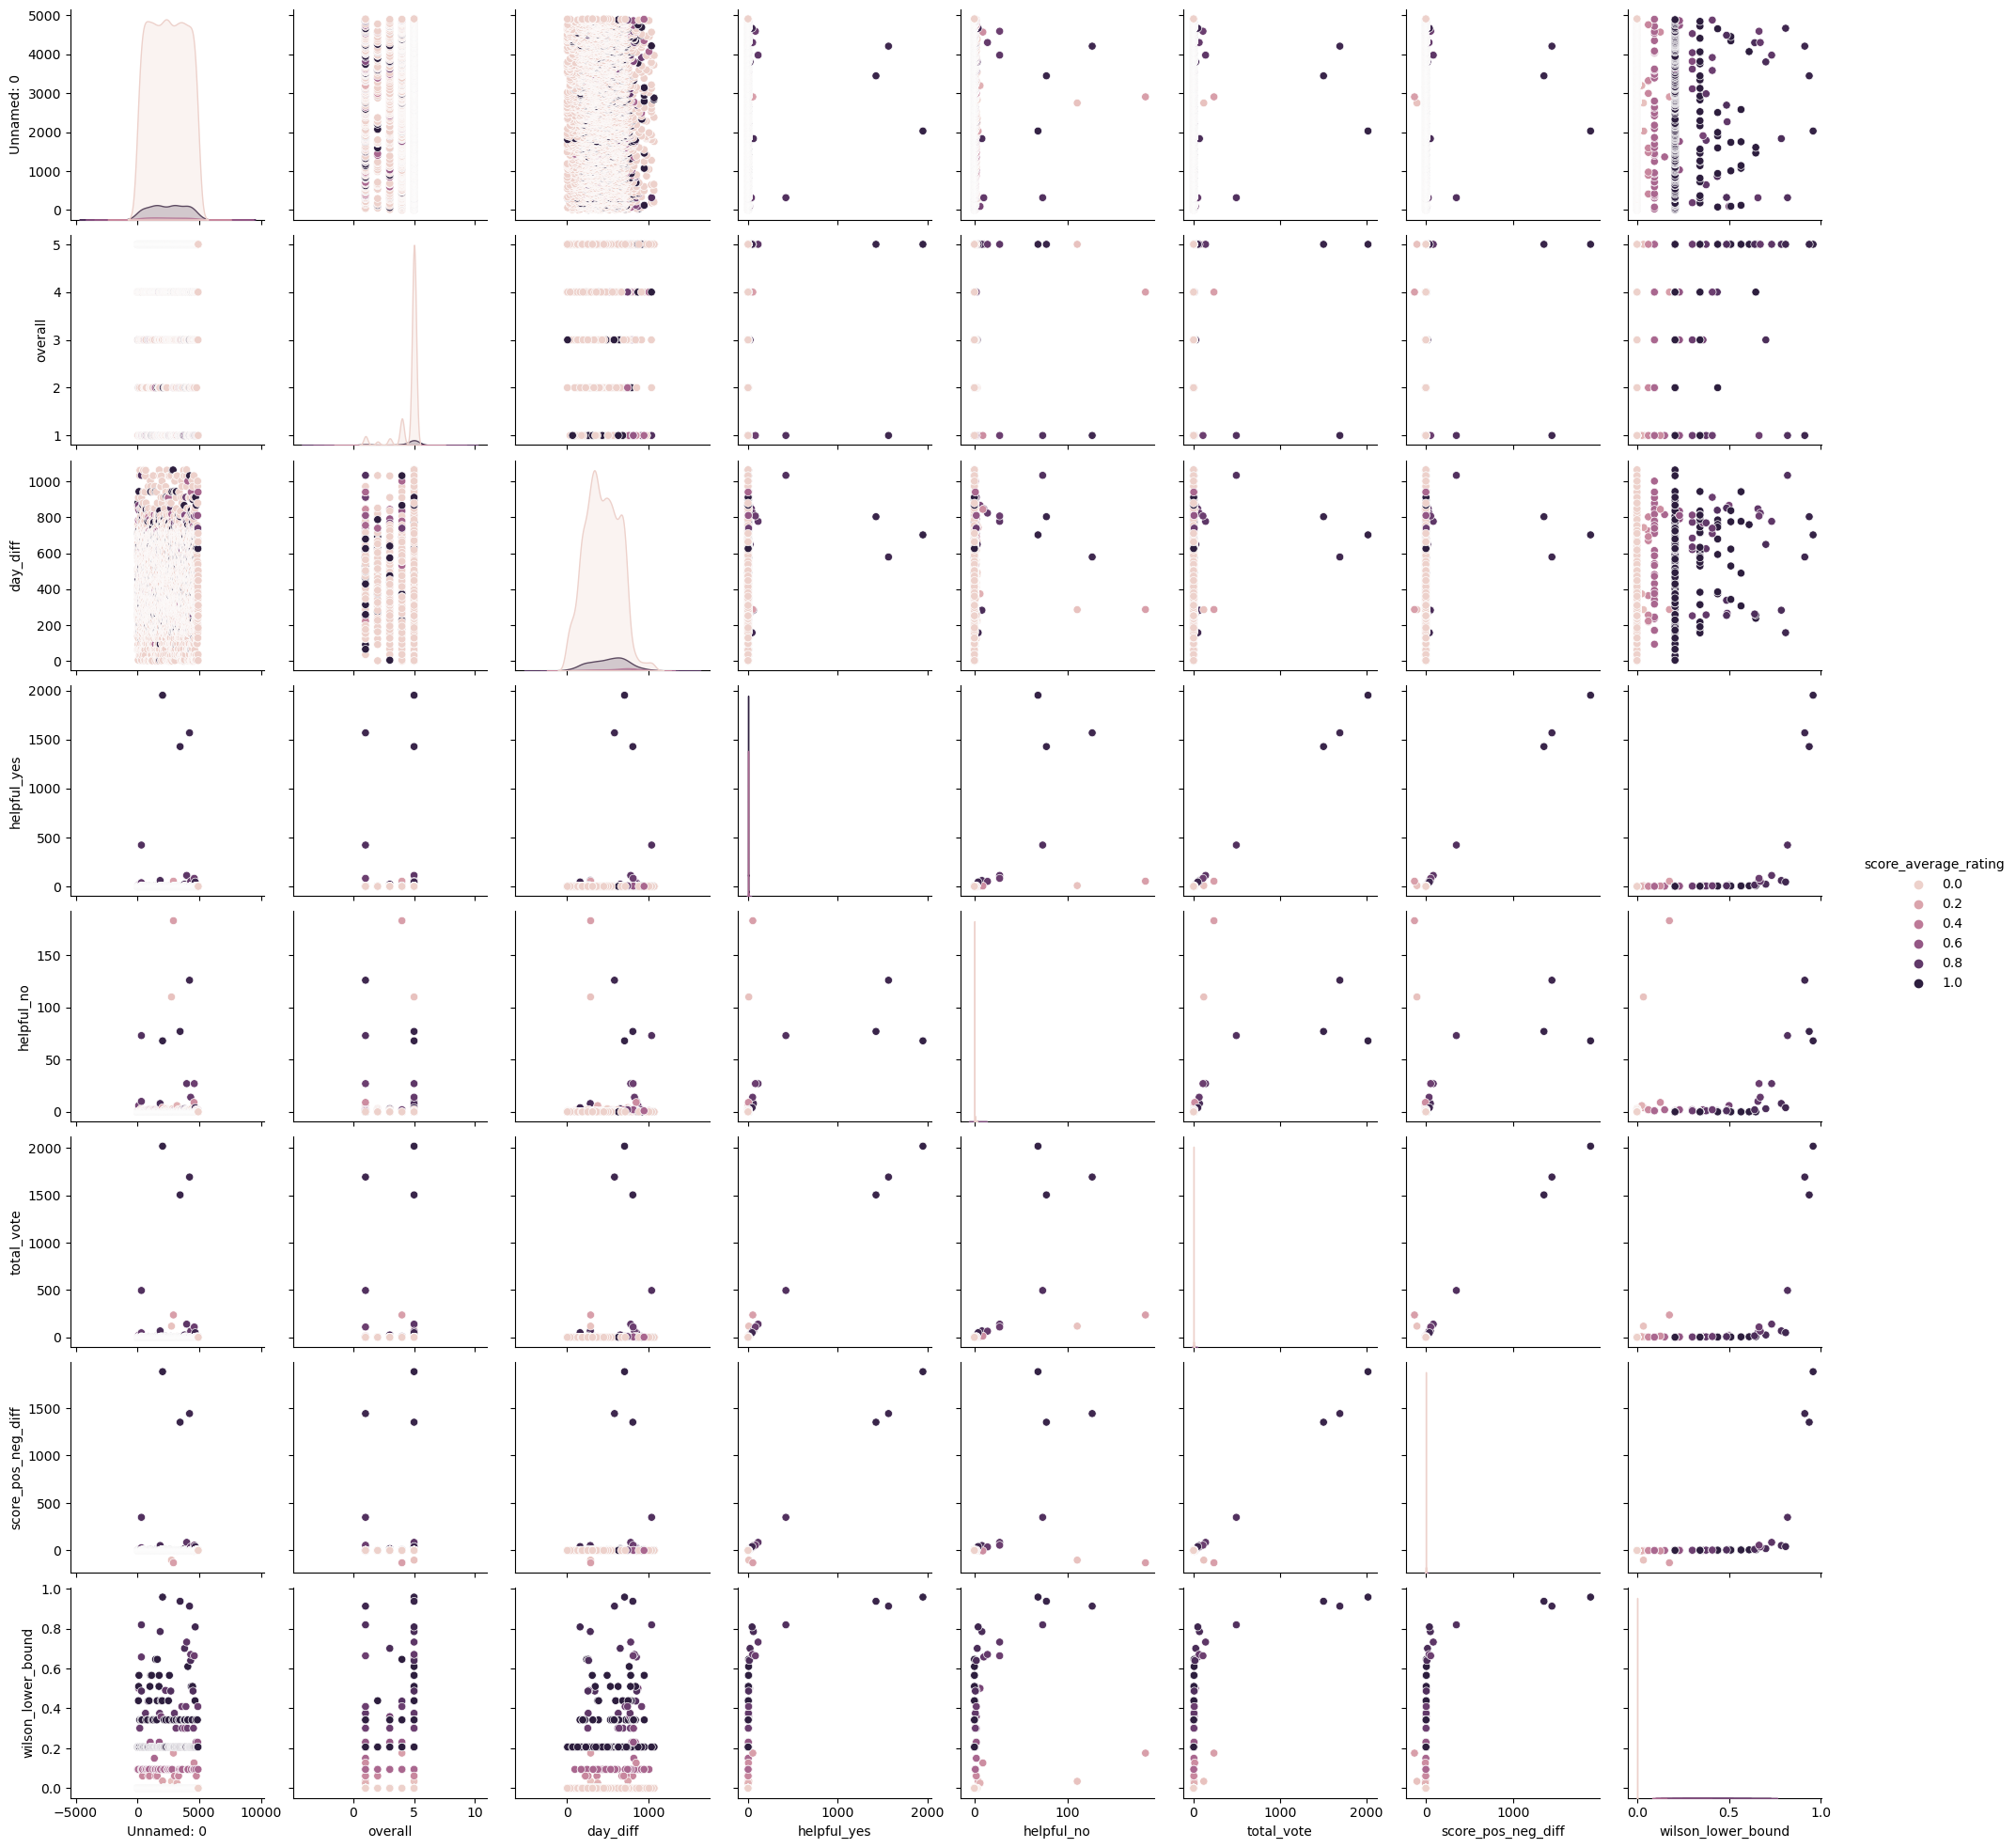

In [12]:
sns.pairplot(df,hue ="score_average_rating")

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/ravikumar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



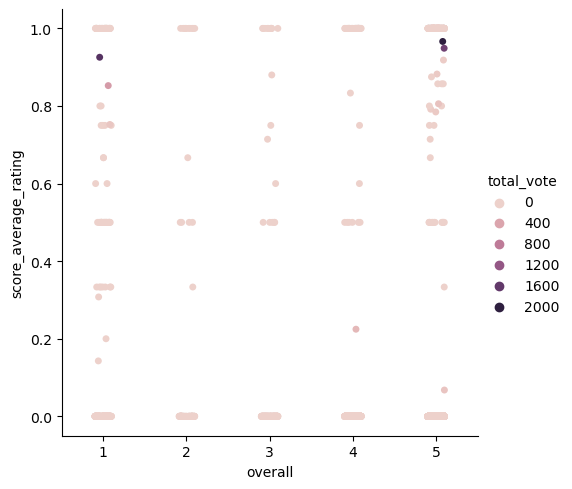

In [14]:
sns.catplot(data=df,x="overall",y="score_average_rating",hue ="total_vote")

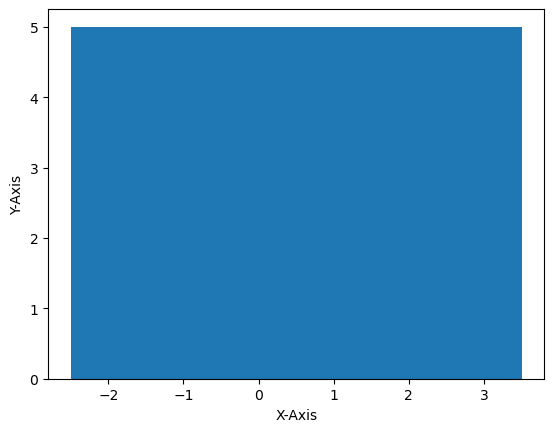

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
file = pd.read_csv("/Users/ravikumar/Downloads/amazon.csv")
x_axis = file['score_average_rating'] 
y_axis = file['overall'] 
plt.bar(x_axis, y_axis, width=5) 
plt.xlabel("X-Axis") 
plt.ylabel("Y-Axis") 
plt.show() 


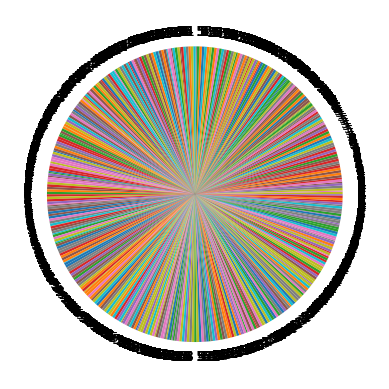

In [16]:
import matplotlib.pyplot as plt 
import pandas as pd 
file = pd.read_csv("/Users/ravikumar/Downloads/amazon.csv")
plt.pie(file['score_average_rating'],labels=file['overall']) 
plt.show()

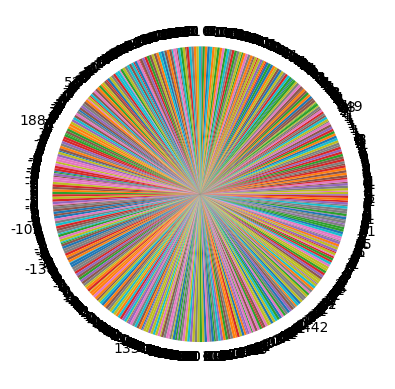

In [19]:
plt.pie(file['score_average_rating'],labels=file['score_pos_neg_diff']) 
plt.show()

In [17]:
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [4]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.callbacks import Callback, ModelCheckpoint
from keras_preprocessing.image import load_img
from keras_preprocessing import text, sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import json

In [19]:
df = pd.read_csv('/Users/ravikumar/Downloads/archive/Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#shape of the dataset  details
df.shape


(568454, 10)

In [7]:
#Print the data types
df.dtypes


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [8]:
#info of the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
#Describe the data set of the module
df.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [10]:
##Removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [11]:
#Check for the null values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [12]:
##Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [13]:
#Now the data set is clear so we can check it 
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Score')

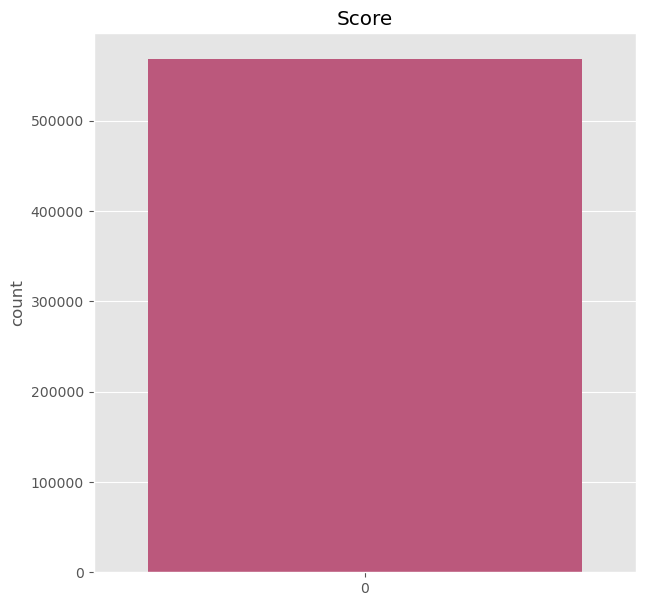

In [24]:
import seaborn as sns
df = pd.read_csv('/Users/ravikumar/Downloads/archive/Reviews.csv')
sns.countplot(df['Score'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('Score')

In [25]:
rating_df = pd.DataFrame(df, columns=['Score', 'Text'])

print(rating_df.shape)
rating_df.head()

(568454, 2)


,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [26]:
rating_df['Score'].astype('category').value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [27]:
dummies = pd.get_dummies(rating_df['Score'])
dummies.head()

,1,2,3,4,5
0,False,False,False,False,True
1,True,False,False,False,False
2,False,False,False,True,False
3,False,True,False,False,False
4,False,False,False,False,True


In [28]:
## Lower Casing
rating_df['Text'] = rating_df['Text'].str.lower()
rating_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [29]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_punctuation(text))
rating_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price there was a wide...


In [30]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_stopwords(text))
rating_df.head()

,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanutsth...
2,4,confection around centuries light pillowy citr...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...
